Multilayer Perceptron

# Importing the required modules

In [4]:
# Modules used for data handling and linear algebra operations.
import pandas as pd
import numpy as np

# Modules used for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# Modules used for preprocessing
from sklearn.preprocessing import OneHotEncoder

# Modules used for Machine Learning models.
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

# Modules used for hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Models used for evaluating the model.
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Suppressing the warnings.
import warnings
warnings.filterwarnings('ignore')

# Comparision of the Perceptron and MLP on Credit Card Approval Dataset

## Reading the dataset

In [5]:
import sys
print(sys.path)
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/crx.data", header=None)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython']


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Glimpse into the dataset

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


## Data Type Distribution

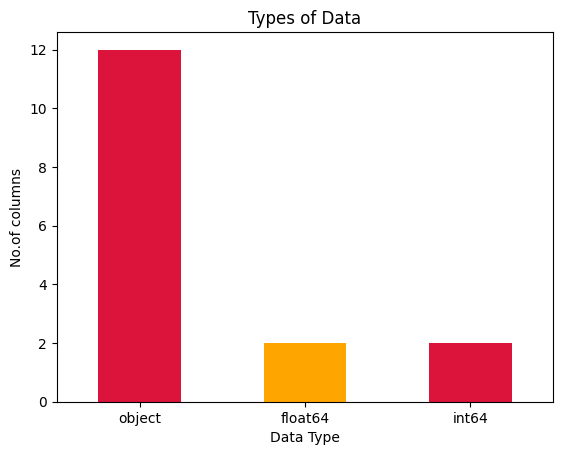

In [8]:
df.dtypes.value_counts().plot(kind="bar",
                              title="Types of Data",
                              xlabel="Data Type",
                              ylabel="No.of columns",
                              rot=0,
                              color=["crimson","orange"])
plt.show()

Most of columns are categorical while the others are numerical.

## Seggragation of Columns

In [9]:
cat_cols = []
num_cols = []

for i in df.columns:
    if df[i].dtype == "O":
        cat_cols.append(i)
    else:
        num_cols.append(i)

## Missing Values Analysis

In [10]:
null_freq = []
for i in df.columns:
    f = dict(df[i].value_counts())
    if "?" in f.keys():
        null_freq.append(f["?"]*100/len(df))
    else:
        null_freq.append(0)

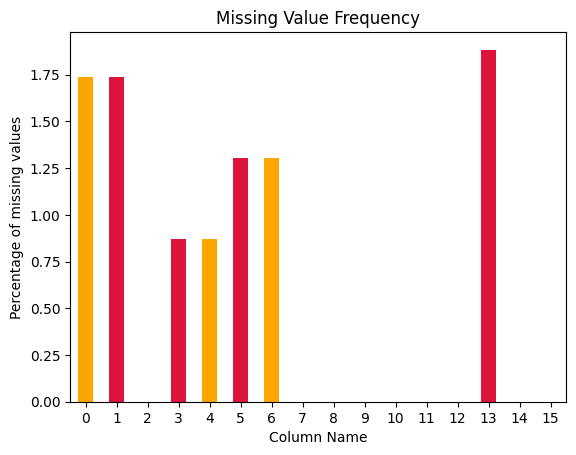

In [11]:
pd.Series(dict(zip(df.columns,null_freq))).plot(kind="bar",
                                                rot=0,
                                                title="Missing Value Frequency",
                                                xlabel="Column Name",
                                                ylabel="Percentage of missing values",
                                                color=["orange","crimson"])
plt.show()

Only 2% of the rows are null and hence directly dropping them is feasible compared to imputation.

## Target Variable Analysis

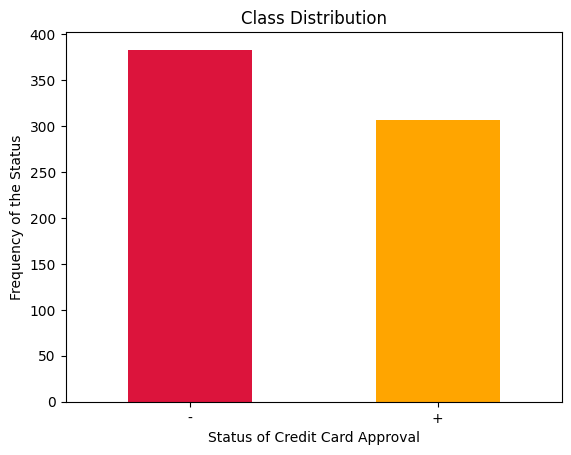

In [12]:
df[15].value_counts().plot(kind="bar",
                           title="Class Distribution",
                           xlabel="Status of Credit Card Approval",
                           ylabel="Frequency of the Status",
                           color=["crimson","orange"],
                           rot=0)
plt.show()

The dataset is biased to class "-" since it has higher instances of that class compared to others.

## Pre-processing

### Handling Missing Values

In [13]:
df = df.replace({"?":None})

In [14]:
df = df.dropna()

### Encoding the categorical variables

In [15]:
encoder = OneHotEncoder(sparse=False)
for i in cat_cols:
    df[i] = encoder.fit_transform(df[i].values.reshape(-1,1))

In [16]:
df = df.reset_index()

## Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,
    df[15],
    test_size = 0.10,
    train_size=0.90,
    random_state = 0
)
X_train.pop(15)
X_test.pop(15)

535    1.0
492    1.0
14     1.0
247    0.0
85     0.0
      ... 
506    0.0
266    0.0
155    1.0
403    0.0
18     1.0
Name: 15, Length: 66, dtype: float64

## Perceptron

### Training and Fitting the model

In [21]:
clf = Perceptron(random_state=0)

In [26]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
clf.fit(X_train,y_train)

Perceptron()

### Validating the model

#### Predictions from the model on the train and test dataset

In [27]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

#### Accuracy on the train dataset

In [28]:
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)

0.676320272572402

#### Accuracy on the test dataset

In [29]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.7575757575757576

## Multilayer Perceptron

In [30]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

### Validating the model

#### Predictions from the model

In [31]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

#### Accuracy on the train dataset

In [32]:
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)

0.8909710391822828

#### Accuracy on the test dataset

In [33]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.803030303030303

## Comparative Inferences

- The Perceptron model gives an accuracy of 67% and 75% on the test and train dataset respectively.
- The MLP model gives an accuracy of 78% and 79% on the test and train dataset respectively.
- Addition of hidden layers gives better results indicating the dataset is not linearly separable.
- The MLP is able to learn a non-linear decision boundary compared to Perceptron which is a linear classifier.